# This is the basic implementation. Using tensorflow's keras class.

#### Has shuffling of the data, normalaisation of the features (but on whole df not column wise)

#### Has custom callback. The printing of dot with each epoch.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.3.1


In [2]:
import pandas as pd

# Loding data directly from Tensorflow

In [3]:
boston_housing = keras.datasets.boston_housing

In [4]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Analysing the data

The dataset contains 13 different features:

Per capita crime rate. <br>
The proportion of residential land zoned for lots over 25,000 square feet.<br>
The proportion of non-retail business acres per town.<br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
Nitric oxides concentration (parts per 10 million).<br>
The average number of rooms per dwelling.<br>
The proportion of owner-occupied units built before 1940.<br>
Weighted distances to five Boston employment centers.<br>
Index of accessibility to radial highways.<br>
Full-value property-tax rate per $10,000. <br>
Pupil-teacher ratio by town.<br>
1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.<br>
Percentage lower status of the population. <br>

In [5]:
# There are 12 features in the data
# 404 training rows
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [6]:
# 102 test rows
pd.DataFrame(test_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18.08460,0.0,18.10,0.0,0.6790,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.5470,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.5150,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.4490,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44
5,0.27957,0.0,9.69,0.0,0.5850,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
6,0.03049,55.0,3.78,0.0,0.4840,6.874,28.1,6.4654,5.0,370.0,17.6,387.97,4.61
7,0.03551,25.0,4.86,0.0,0.4260,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51
8,0.09299,0.0,25.65,0.0,0.5810,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
9,3.56868,0.0,18.10,0.0,0.5800,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36


In [6]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


# Shuffle the training set

In [7]:
# argsort - Returns the indices that would sort an array.
# np.random.random - generate samples from the uniform distribution on [0, 1).
np.random.seed(0)
order = np.argsort(np.random.random(train_labels.shape))

In [9]:
train_data = train_data[order]
train_labels = train_labels[order]

# Visualising the data

## Features

In [11]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
1,0.52058,0.0,6.20,1.0,0.5070,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54
2,6.28807,0.0,18.10,0.0,0.7400,6.341,96.4,2.0720,24.0,666.0,20.2,318.01,17.79
3,0.10659,80.0,1.91,0.0,0.4130,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
4,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02


## Labels

In [12]:
# The labels are the house prices in thousands of dollars

print(train_labels[0:10])

[45.4 25.1 14.9 20.6 15.6 22.7 22.8 17.  19.7 30.5]


# Normalize features

It's recommended to normalize features that use different scales and ranges. For each feature, subtract the mean of the feature and divide by the standard deviation

In [13]:
# Test data is *not* used when calculating the mean and std.

# Calculating column wise mean and std
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.40190852  0.35890566 -1.14281587 -0.25683275 -0.97702129  2.19057613
 -0.16163668  0.47069536 -0.51114231 -1.1428069  -1.62718308  0.34605
 -1.23949229]


# Create the model

Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [15]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

    optimizer = tf.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# Train the model

The model is trained for 500 epochs, and record the training and validation accuracy in the history object.

In [16]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1,
                    callbacks=[PrintDot()])

Epoch 1/500
11/11 [==============================] - 0s 23ms/step - loss: 544.3390 - mae: 21.3409 - val_loss: 471.9128 - val_mae: 20.1240
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 462.1577 - mae: 19.3168 - val_loss: 396.4579 - val_mae: 18.1948
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 380.9586 - mae: 17.1189 - val_loss: 318.9368 - val_mae: 16.0550
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 299.1760 - mae: 14.8143 - val_loss: 238.6523 - val_mae: 13.4843
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 219.4169 - mae: 12.3566 - val_loss: 165.8060 - val_mae: 10.8727
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 153.7905 - mae: 9.8949 - val_loss: 111.2761 - val_mae: 8.5142
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 107.2845 - mae: 8.0736 - val_loss: 77.6724 - val_mae: 6.8201
Epoch 8/500
11/11 [==========================

11/11 [==============================] - 0s 2ms/step - loss: 7.5173 - mae: 1.9520 - val_loss: 12.6028 - val_mae: 2.3628
Epoch 62/500
11/11 [==============================] - 0s 2ms/step - loss: 7.4921 - mae: 1.9986 - val_loss: 12.5857 - val_mae: 2.2847
Epoch 63/500
11/11 [==============================] - 0s 2ms/step - loss: 7.2124 - mae: 1.9586 - val_loss: 14.7633 - val_mae: 2.3650
Epoch 64/500
11/11 [==============================] - 0s 2ms/step - loss: 7.3850 - mae: 1.9545 - val_loss: 13.2804 - val_mae: 2.3475
Epoch 65/500
11/11 [==============================] - 0s 2ms/step - loss: 7.3774 - mae: 1.9348 - val_loss: 12.6727 - val_mae: 2.1829
Epoch 66/500
11/11 [==============================] - 0s 2ms/step - loss: 7.0558 - mae: 1.9301 - val_loss: 12.7512 - val_mae: 2.3266
Epoch 67/500
11/11 [==============================] - 0s 2ms/step - loss: 7.0223 - mae: 1.9240 - val_loss: 13.6454 - val_mae: 2.2201
Epoch 68/500
11/11 [==============================] - 0s 2ms/step - loss: 6.9521 -

Epoch 122/500
11/11 [==============================] - 0s 2ms/step - loss: 4.9457 - mae: 1.6380 - val_loss: 12.4775 - val_mae: 2.1718
Epoch 123/500
11/11 [==============================] - 0s 2ms/step - loss: 5.2089 - mae: 1.6860 - val_loss: 11.4665 - val_mae: 2.1639
Epoch 124/500
11/11 [==============================] - 0s 2ms/step - loss: 5.0563 - mae: 1.6756 - val_loss: 13.6836 - val_mae: 2.1701
Epoch 125/500
11/11 [==============================] - 0s 2ms/step - loss: 5.2657 - mae: 1.6317 - val_loss: 12.7898 - val_mae: 2.1682
Epoch 126/500
11/11 [==============================] - 0s 2ms/step - loss: 5.1808 - mae: 1.6965 - val_loss: 12.5846 - val_mae: 2.0889
Epoch 127/500
11/11 [==============================] - 0s 2ms/step - loss: 5.0118 - mae: 1.6372 - val_loss: 11.6413 - val_mae: 2.1000
Epoch 128/500
11/11 [==============================] - 0s 2ms/step - loss: 4.8420 - mae: 1.6238 - val_loss: 11.2980 - val_mae: 2.0998
Epoch 129/500
11/11 [==============================] - 0s 2ms/

11/11 [==============================] - 0s 2ms/step - loss: 3.8871 - mae: 1.4684 - val_loss: 11.4304 - val_mae: 2.0113
Epoch 184/500
11/11 [==============================] - 0s 2ms/step - loss: 3.8147 - mae: 1.4416 - val_loss: 11.5405 - val_mae: 2.1764
Epoch 185/500
11/11 [==============================] - 0s 2ms/step - loss: 3.9242 - mae: 1.4642 - val_loss: 12.0037 - val_mae: 2.1116
Epoch 186/500
11/11 [==============================] - 0s 2ms/step - loss: 3.7702 - mae: 1.4428 - val_loss: 11.9667 - val_mae: 2.1727
Epoch 187/500
11/11 [==============================] - 0s 2ms/step - loss: 3.8952 - mae: 1.4575 - val_loss: 12.9387 - val_mae: 2.1411
Epoch 188/500
11/11 [==============================] - 0s 2ms/step - loss: 3.8967 - mae: 1.4780 - val_loss: 12.3367 - val_mae: 2.1072
Epoch 189/500
11/11 [==============================] - 0s 2ms/step - loss: 3.9840 - mae: 1.4775 - val_loss: 13.9693 - val_mae: 2.6082
Epoch 190/500
11/11 [==============================] - 0s 2ms/step - loss: 4

11/11 [==============================] - 0s 3ms/step - loss: 3.1165 - mae: 1.3068 - val_loss: 12.5964 - val_mae: 2.2242
Epoch 244/500
11/11 [==============================] - 0s 2ms/step - loss: 3.0820 - mae: 1.2880 - val_loss: 12.6537 - val_mae: 2.5428
Epoch 245/500
11/11 [==============================] - 0s 3ms/step - loss: 3.1157 - mae: 1.3354 - val_loss: 12.3894 - val_mae: 2.1514
Epoch 246/500
11/11 [==============================] - 0s 2ms/step - loss: 2.9036 - mae: 1.2774 - val_loss: 12.0427 - val_mae: 2.1351
Epoch 247/500
11/11 [==============================] - 0s 2ms/step - loss: 3.2381 - mae: 1.3631 - val_loss: 12.4117 - val_mae: 2.1271
Epoch 248/500
11/11 [==============================] - 0s 2ms/step - loss: 2.9474 - mae: 1.2788 - val_loss: 12.4040 - val_mae: 2.2838
Epoch 249/500
11/11 [==============================] - 0s 2ms/step - loss: 2.8910 - mae: 1.2560 - val_loss: 14.2017 - val_mae: 2.3525
Epoch 250/500
11/11 [==============================] - 0s 3ms/step - loss: 3

11/11 [==============================] - 0s 2ms/step - loss: 2.4627 - mae: 1.1726 - val_loss: 13.5357 - val_mae: 2.4861
Epoch 304/500
11/11 [==============================] - 0s 2ms/step - loss: 2.4527 - mae: 1.1449 - val_loss: 11.9677 - val_mae: 2.2400
Epoch 305/500
11/11 [==============================] - 0s 3ms/step - loss: 2.4520 - mae: 1.1589 - val_loss: 12.3871 - val_mae: 2.2047
Epoch 306/500
11/11 [==============================] - 0s 2ms/step - loss: 2.6001 - mae: 1.1860 - val_loss: 13.7840 - val_mae: 2.4248
Epoch 307/500
11/11 [==============================] - 0s 2ms/step - loss: 2.3467 - mae: 1.1382 - val_loss: 12.8071 - val_mae: 2.3308
Epoch 308/500
11/11 [==============================] - 0s 2ms/step - loss: 2.3109 - mae: 1.1262 - val_loss: 12.3952 - val_mae: 2.1776
Epoch 309/500
11/11 [==============================] - 0s 3ms/step - loss: 2.5010 - mae: 1.1622 - val_loss: 13.6393 - val_mae: 2.4316
Epoch 310/500
11/11 [==============================] - 0s 2ms/step - loss: 2

11/11 [==============================] - 0s 2ms/step - loss: 2.1789 - mae: 1.0701 - val_loss: 14.0381 - val_mae: 2.5843
Epoch 365/500
11/11 [==============================] - 0s 2ms/step - loss: 2.1283 - mae: 1.0687 - val_loss: 12.6550 - val_mae: 2.3585
Epoch 366/500
11/11 [==============================] - 0s 2ms/step - loss: 1.9374 - mae: 1.0254 - val_loss: 13.1669 - val_mae: 2.3494
Epoch 367/500
11/11 [==============================] - 0s 2ms/step - loss: 2.0433 - mae: 1.0644 - val_loss: 12.9163 - val_mae: 2.2708
Epoch 368/500
11/11 [==============================] - 0s 2ms/step - loss: 2.1836 - mae: 1.0629 - val_loss: 12.5594 - val_mae: 2.2637
Epoch 369/500
11/11 [==============================] - 0s 2ms/step - loss: 1.9408 - mae: 0.9990 - val_loss: 12.8464 - val_mae: 2.3238
Epoch 370/500
11/11 [==============================] - 0s 2ms/step - loss: 2.0112 - mae: 1.0314 - val_loss: 13.0047 - val_mae: 2.3022
Epoch 371/500
11/11 [==============================] - 0s 2ms/step - loss: 1

11/11 [==============================] - 0s 2ms/step - loss: 1.6363 - mae: 0.9355 - val_loss: 12.9996 - val_mae: 2.4472
Epoch 425/500
11/11 [==============================] - 0s 2ms/step - loss: 1.6750 - mae: 0.9417 - val_loss: 15.5537 - val_mae: 2.8234
Epoch 426/500
11/11 [==============================] - 0s 2ms/step - loss: 1.9275 - mae: 0.9828 - val_loss: 13.7108 - val_mae: 2.5478
Epoch 427/500
11/11 [==============================] - 0s 2ms/step - loss: 1.6626 - mae: 0.9325 - val_loss: 13.2642 - val_mae: 2.2606
Epoch 428/500
11/11 [==============================] - 0s 2ms/step - loss: 1.8786 - mae: 0.9944 - val_loss: 12.6611 - val_mae: 2.3899
Epoch 429/500
11/11 [==============================] - 0s 2ms/step - loss: 1.7726 - mae: 0.9436 - val_loss: 14.8418 - val_mae: 2.7594
Epoch 430/500
11/11 [==============================] - 0s 2ms/step - loss: 1.9308 - mae: 1.0191 - val_loss: 12.7234 - val_mae: 2.3627
Epoch 431/500
11/11 [==============================] - 0s 2ms/step - loss: 1

11/11 [==============================] - 0s 3ms/step - loss: 1.4071 - mae: 0.8660 - val_loss: 13.8331 - val_mae: 2.4217
Epoch 486/500
11/11 [==============================] - 0s 2ms/step - loss: 1.5712 - mae: 0.9230 - val_loss: 14.2784 - val_mae: 2.3457
Epoch 487/500
11/11 [==============================] - 0s 2ms/step - loss: 1.6814 - mae: 0.9484 - val_loss: 13.3570 - val_mae: 2.4901
Epoch 488/500
11/11 [==============================] - 0s 2ms/step - loss: 1.5760 - mae: 0.9069 - val_loss: 13.3545 - val_mae: 2.3366
Epoch 489/500
11/11 [==============================] - 0s 2ms/step - loss: 1.3802 - mae: 0.8525 - val_loss: 13.3571 - val_mae: 2.4788
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 1.5370 - mae: 0.9062 - val_loss: 12.7308 - val_mae: 2.3944
Epoch 491/500
11/11 [==============================] - 0s 2ms/step - loss: 1.4020 - mae: 0.8545 - val_loss: 13.0195 - val_mae: 2.3054
Epoch 492/500
11/11 [==============================] - 0s 2ms/step - loss: 1

Visualize the model's training progress using the stats stored in the history object. We want to use this data to determine how long to train before the model stops making progress.

In [22]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

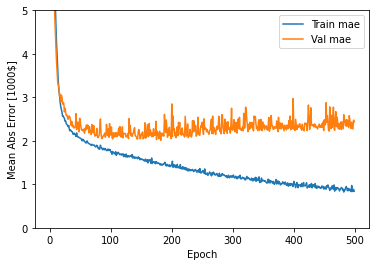

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train mae')
    plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val mae')
    plt.legend()
    plt.ylim([0,5])

plot_history(history)

This graph shows little improvement in the model after about 200 epochs. Let's update the model.fit method to automatically stop training when the validation score doesn't improve. We'll use a callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

Epoch 1/500
11/11 [==============================] - 0s 10ms/step - loss: 544.5189 - mae: 21.3138 - val_loss: 472.4225 - val_mae: 20.0362
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 465.2781 - mae: 19.3331 - val_loss: 403.8629 - val_mae: 18.2781
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 388.6270 - mae: 17.3476 - val_loss: 324.8369 - val_mae: 16.1021
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 303.0110 - mae: 14.9650 - val_loss: 240.3381 - val_mae: 13.5192
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 216.4394 - mae: 12.2485 - val_loss: 160.6627 - val_mae: 10.5851
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 144.0685 - mae: 9.5840 - val_loss: 110.8360 - val_mae: 8.3050
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 99.5053 - mae: 7.7469 - val_loss: 73.3105 - val_mae: 6.4289
Epoch 8/500
11/11 [===========================

11/11 [==============================] - 0s 2ms/step - loss: 8.4621 - mae: 2.1440 - val_loss: 12.7502 - val_mae: 2.2147
Epoch 62/500
11/11 [==============================] - 0s 2ms/step - loss: 7.9582 - mae: 2.0082 - val_loss: 13.8988 - val_mae: 2.5040
Epoch 63/500
11/11 [==============================] - 0s 2ms/step - loss: 8.1379 - mae: 2.0829 - val_loss: 13.4621 - val_mae: 2.2170
Epoch 64/500
11/11 [==============================] - 0s 2ms/step - loss: 8.0452 - mae: 1.9979 - val_loss: 12.4515 - val_mae: 2.2255
Epoch 65/500
11/11 [==============================] - 0s 2ms/step - loss: 8.1188 - mae: 2.0633 - val_loss: 13.0598 - val_mae: 2.2102
Epoch 66/500
11/11 [==============================] - 0s 2ms/step - loss: 7.8753 - mae: 1.9956 - val_loss: 13.6956 - val_mae: 2.2389
Epoch 67/500
11/11 [==============================] - 0s 2ms/step - loss: 7.9105 - mae: 1.9942 - val_loss: 12.9677 - val_mae: 2.2381
Epoch 68/500
11/11 [==============================] - 0s 2ms/step - loss: 7.7308 -

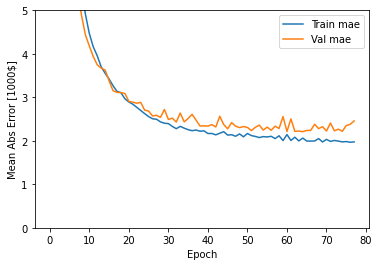

In [31]:
%matplotlib inline
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

Let's see how did the model performs on the test set:

In [32]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3117.81


# Predicting on the Test data

In [33]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[11.278067 19.435219 21.748693 31.292349 25.526495 20.472311 26.90453
 21.74238  20.963842 24.469542 17.181751 17.229193 17.491232 42.63613
 20.286432 19.514547 25.679842 20.829485 21.122982 33.148117 13.392269
 16.064754 21.150322 17.022537 21.265265 26.55911  31.195677 29.620646
 13.146992 20.640814 20.573057 15.968612 33.82805  24.026712 19.238176
 10.37743  17.004377 19.446775 21.700758 25.5073   28.793806 28.418842
 15.928351 40.634552 30.674162 24.725939 27.433249 17.826216 24.522776
 22.39473  33.805508 21.682905 14.973867 17.53305  35.50396  28.048298
 13.596837 48.462994 35.15036  23.124159 26.732267 18.685652 16.181181
 19.548674 22.95994  22.523249 15.154825 23.042494 17.28887   8.803266
 33.17032  28.533155 27.186827 17.288658 25.552412 18.928617 20.084763
 23.542555 35.75457  14.128403 20.430431 39.031918 17.883705 15.135948
 18.343435 19.04466  21.422472 21.89456  22.563715 33.354225 20.914417
 20.398748 24.322433 40.58147  36.370995 21.643543 37.07644  55.630123
 25.8950

# Conclusion

This notebook introduced a few techniques to handle a regression problem.

Mean Squared Error (MSE) is a common loss function used for regression problems (different than classification problems). <br>
Similarly, evaluation metrics used for regression differ from classification. <br> 
A common regression metric is Mean Absolute Error (MAE).<br>
When input data features have values with different ranges, each feature should be scaled independently. <br>
If there is not much training data, prefer a small network with few hidden layers to avoid overfitting. <br>
Early stopping is a useful technique to prevent overfitting.<br>
